In [44]:
# Create dummy data
from pathlib import Path
import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio.profiles import DefaultGTiffProfile

from shapely.geometry import box

from pyproj import CRS

In [62]:
prof = DefaultGTiffProfile()

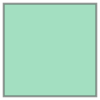

In [63]:
bounds = -2, -2, 2, 2
box(*bounds)

In [64]:
xmin, ymin, xmax, ymax = bounds

In [65]:
?rio.transform.from_bounds

Signature: rio.transform.from_bounds(west, south, east, north, width, height)
Docstring:
Return an Affine transformation given bounds, width and height.

Return an Affine transformation for a georeferenced raster given
its bounds `west`, `south`, `east`, `north` and its `width` and
`height` in number of pixels.
File:      ~/miniforge3/envs/geo/lib/python3.12/site-packages/rasterio/transform.py
Type:      function

In [66]:
prof.keys()

KeysView({'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': 0, 'dtype': 'uint8'})

In [55]:
bnds = []
shp = (1,10,10)
out_dir = Path('./data')

prof.update({
    'blockxsize': 16,
    'blockysize': 16,
    'crs':CRS.from_epsg(4326),
    'width':shp[2],
    'height':shp[1],
    'count':shp[0],
})

i = 0
for x in range(xmin, xmax):
    for y in range(ymin, ymax):
        i+=1
        bnds.append(box(x, y, x+0.9999999, y+0.9999999))
        prof.update({
            'transform':rio.transform.from_bounds(
                x, y, x+0.9999999, y+0.9999999, shp[2], shp[1],
            ),
        })
        with rio.open(out_dir/f"x{x}_y{y}.tif", 'w', **prof) as dst:
            dst.write(np.full(shp, i, dtype=np.uint8))

<Axes: >

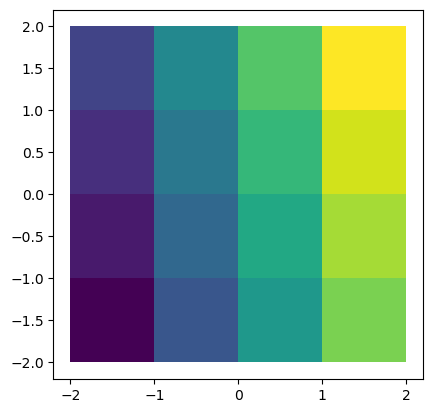

In [60]:
gpd.GeoDataFrame(
    {'value':list(range(1, len(bnds)+1))},
    geometry=bnds,
).plot(column='value')